## Find the minimal of Randomly Generated Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Numpy library has functions used for working with arrays and matrices
# faster, clearer and better quality code using Numpy

# Matplotlib is a 2D plotting library for visualising data in Python
# mpl_toolkits.mplot3d is a module for making 3D graphs

## Generate random input data to train on

In [2]:
observations = 10000
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

inputs = np.column_stack((xs,zs))
print(inputs.shape)

# using randomly generated data will allow us to rerun the algorithm with new inputs each time
# the number of observations affect the speed of the algorithm (using 10000 currently)

# then the generated data is put into a dataframe called 'inputs'

(10000, 2)


## Create the targets we will aim at

In [3]:
noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs +5 + noise
print(targets.shape)

# using randomly generated targets to be sure there's a linear relationship
# this is the function the algorithm must learn in order to predict the output
# the weights are 2, -3 and the bias is 5.
# the targets are the combination of vectors (10,000 by 1)

(10000, 1)


## Plot the training data
##### the point here is to have a strong trend that our model should learn to reproduce

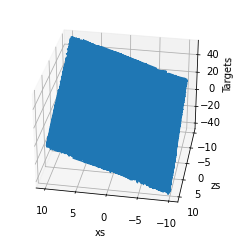

In [4]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

# this 3D plot visualises the strong linear relationship

### Initialize variables

In [5]:
init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size=(2,1))

biases = np.random.uniform(-init_range, init_range, size=1)

print(weights)
print(biases)

# "init_range" will be the radius of the range we will use to initialize the weights and the biases
# the weights will be picked randomly from the range -0.1 to 0.1, the size of the weights matrix is 2 by 1 as we have 2 variables
# in machine learning, there are as many biases as there are outputs, each bias refers to an output

[[-0.06874514]
 [ 0.09126018]]
[-0.09188771]


### Set a learning rate

In [6]:
learning_rate = 0.02
# Change this rate to optimize algorithm to reach minimum fast
# but not too fast that it oscillates around the minimum indefinitly

### Train the model

In [10]:
for i in range(100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    loss = np.sum(deltas ** 2) / 2 / observations
    print(loss)
    deltas_scaled = deltas / observations
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    
# Plan for each iteration of this function - calculate outputs, compare the outputs to targets through the loss, print the loss,
# adjust the weights and biases, recalculate outputs, re-iterate
# ouput = input * weight + biases
# Deltas are the difference between the outputs and the targets
# then the loss function is calculated


0.39221592842305775
0.38320238131835105
0.3745457481289336
0.3662318959566862
0.35824725153089676
0.35057877904841617
0.3432139588912874
0.3361407671871025
0.32934765617871986
0.3228235353712901
0.31655775342581544
0.3105400807696718
0.3047606928957221
0.2992101543227312
0.29387940319091405
0.2887597364674652
0.2838427957379021
0.2791205535600471
0.27458530035834805
0.27022963183715737
0.2660464368924115
0.26202888600197655
0.2581704200757095
0.25446473974702793
0.2509057950885056
0.24748777573470648
0.24420510139613044
0.2410524127487804
0.23802456268448144
0.235116607907665
0.2323238008649003
0.22964158199399576
0.22706557228001392
0.2245915661060549
0.22221552438712605
0.21993356797589445
0.21774197132955786
0.21563715642748876
0.21361568692972369
0.21167426256676536
0.20980971375153248
0.20801899640466173
0.20629918698471725
0.20464747771519043
0.2030611720004968
0.20153768002349196
0.20007451451730993
0.19866928670463102
0.19731970239774055
0.19602355825301834
0.1947787381737388
0

### Print weights and biases and see if we have worked correctly

In [11]:
print(weights, biases)
# the loss function has been minimized with respect to the weights and biases
# this linear function fits the model well
# the weights seem about right (close to 2 and -3)
# the bias is a bit off originally as we used too few iterations or inappropriate learning rate (was around 3.5)
# after re-running the algorithm above, now our weight is much closer to 5 (4.9)
# the bias improves when we increase the number of iterations

[[ 2.00010226]
 [-3.00167677]] [4.90100949]


### Plot last outputs vs targets
##### As they are the last ones at the end of the training, they represent the final accuracy of the model

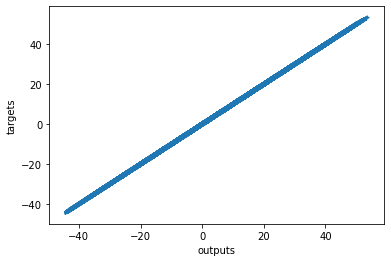

In [12]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()
# this plots the outputs
# The closer the line is to a 45 degree line, the closer target and output values are (more accurate model)